<a href="https://colab.research.google.com/github/godpeny/laboratory/blob/master/Study/Deep_Learning_for_Everyone/Chapter_4/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# install
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install tensorflow

In [39]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [57]:
# using Google Drive

drive.mount("/contents")
file_path = '/contents/My Drive/Colab Notebooks/DL-tutorial/data/pima-indians-diabetes3.csv'

df = pd.read_csv(file_path)

Drive already mounted at /contents; to attempt to forcibly remount, call drive.mount("/contents", force_remount=True).


In [10]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df["diabetes"].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [12]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
df.corr() # 상관관계

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['pregnant'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['plasma'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['thickness'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['pregnant'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['plasma'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['pressure'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['thickness'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['pregnant', 'plasma'], ['plasma', 'pressure'], ['pressure', 'thickness'], ['thickness', 'insulin']]], **{})
chart

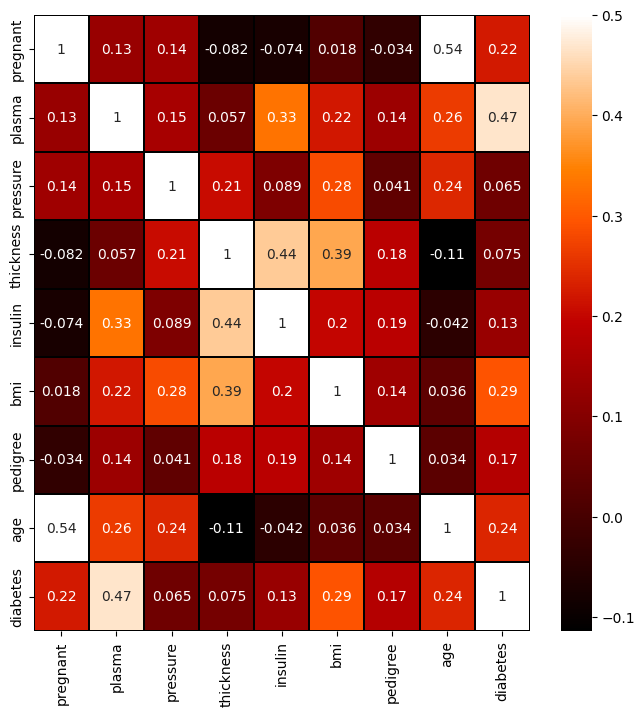

In [27]:
colormap = plt.cm.gist_heat # graph color
plt.figure(figsize=(8,8)) # graph size

sns.heatmap(df.corr(), cmap=colormap, vmax=0.5, linewidths=0.1, linecolor='black', annot=True)
plt.show()

diabetes are highly correlated with plasma(0.47) and bmi(0.29)

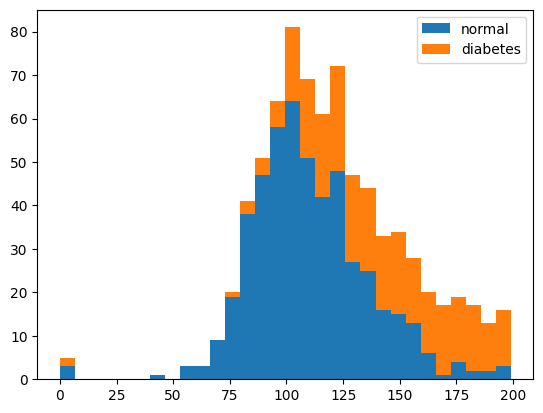

In [33]:
plt.hist(x=[df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

``x=[df.plasma[df.diabetes == 0], df.plasma[df.diabetes == 1]]``

plasm중 diabetes가 0,1인 데이터를 따로 표시

A 'legend' is a small box or area on the plot that provides a visual guide to distinguish the different lines, points, bars, etc., especially when multiple datasets or categories are plotted on the same axes.

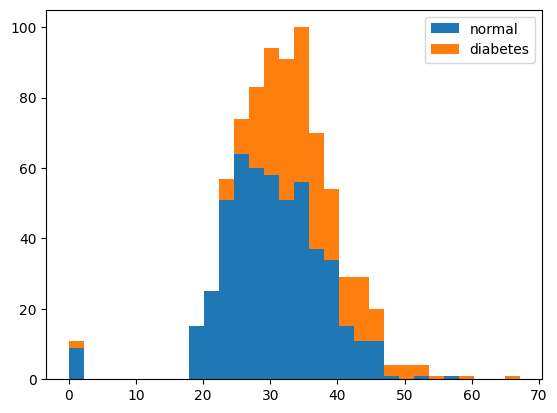

In [38]:
plt.hist(x=[df.bmi[df.diabetes == 0],df.bmi[df.diabetes == 1]], bins=30, histtype='barstacked', label=['normal', 'diabetes'])
plt.legend()

In [54]:
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]

test_df = pd.DataFrame(data)

print(test_df.iloc[0])    # First row of the DataFrame
print(test_df.iloc[:, 0]) # First column of the DataFrame
print(test_df.iloc[1, 1])

0    1
1    2
2    3
Name: 0, dtype: int64
0    1
1    4
2    7
Name: 0, dtype: int64
5


In [74]:
x = df.iloc[:,0:8] # other columns
y = df.iloc[:,8] # diabetes

 ``df.iloc[:,0:8]``

':': The colon before the comma represents all rows in the DataFrame.

'0:8' : The range after the comma represents columns at index 0 to 7.

In [76]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu', name='layer-1'))
model.add(Dense(8, activation='relu', name='layer-2'))
model.add(Dense(1, activation='sigmoid', name='layer-3'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer-1 (Dense)             (None, 12)                108       
                                                                 
 layer-2 (Dense)             (None, 8)                 104       
                                                                 
 layer-3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Params : weight + bias
108 = (8 * 12) + 12
104 = (12 * 8) + 8

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x,y,epochs=100,batch_size=5)

Epoch 1/100
154/154 [==============================] - 3s 2ms/step - loss: 3.3874 - accuracy: 0.6081
Epoch 2/100
154/154 [==============================] - 0s 2ms/step - loss: 0.8219 - accuracy: 0.6003
Epoch 3/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7525 - accuracy: 0.6237
Epoch 4/100
154/154 [==============================] - 0s 2ms/step - loss: 0.7241 - accuracy: 0.6237
Epoch 5/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6886 - accuracy: 0.6510
Epoch 6/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.6484
Epoch 7/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.6628
Epoch 8/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6589
Epoch 9/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6602
Epoch 10/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6258 - accura